<a href="https://colab.research.google.com/github/nehal-moiz/CIFAR-10-Image-Classification-using-Convolutional-Neural-Network-in-PyTorch/blob/main/CIFAR_10_Image_Classification_using_Convolutional_Neural_Network_in_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Files already downloaded and verified
Files already downloaded and verified


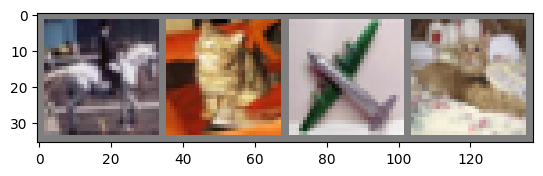

horse cat   plane cat  
[1,  2000] loss: 2.153
[1,  4000] loss: 1.825
[1,  6000] loss: 1.660
[1,  8000] loss: 1.540
[1, 10000] loss: 1.486
[1, 12000] loss: 1.434
[2,  2000] loss: 1.370
[2,  4000] loss: 1.320
[2,  6000] loss: 1.312
[2,  8000] loss: 1.304
[2, 10000] loss: 1.277
[2, 12000] loss: 1.246
[3,  2000] loss: 1.162
[3,  4000] loss: 1.176
[3,  6000] loss: 1.159
[3,  8000] loss: 1.171
[3, 10000] loss: 1.135
[3, 12000] loss: 1.157
[4,  2000] loss: 1.069
[4,  4000] loss: 1.083
[4,  6000] loss: 1.040
[4,  8000] loss: 1.092
[4, 10000] loss: 1.082
[4, 12000] loss: 1.070
[5,  2000] loss: 1.002
[5,  4000] loss: 0.995
[5,  6000] loss: 0.997
[5,  8000] loss: 1.028
[5, 10000] loss: 1.012
[5, 12000] loss: 1.015
[6,  2000] loss: 0.917
[6,  4000] loss: 0.955
[6,  6000] loss: 0.941
[6,  8000] loss: 0.949
[6, 10000] loss: 0.968
[6, 12000] loss: 0.968
[7,  2000] loss: 0.869
[7,  4000] loss: 0.901
[7,  6000] loss: 0.901
[7,  8000] loss: 0.918
[7, 10000] loss: 0.919
[7, 12000] loss: 0.930
[8,  2000]

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

epochs = 10

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

for epoch in range(epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on the test dataset: {100 * correct / total:.2f}%')
